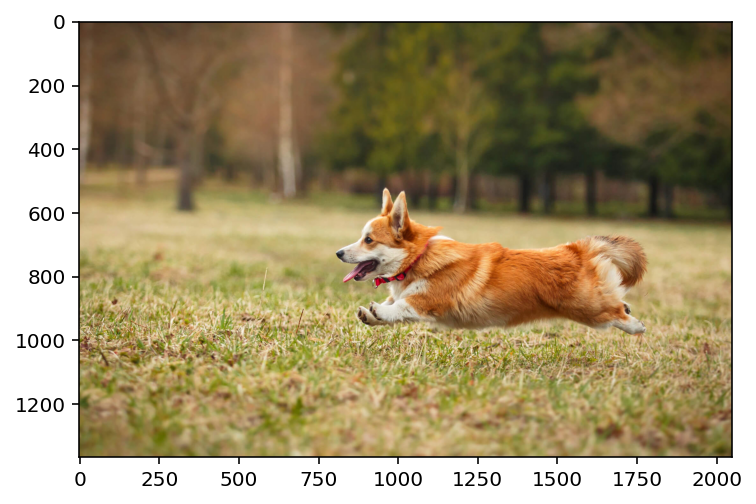

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

img = plt.imread('dog.jpg')
plt.imshow(img)

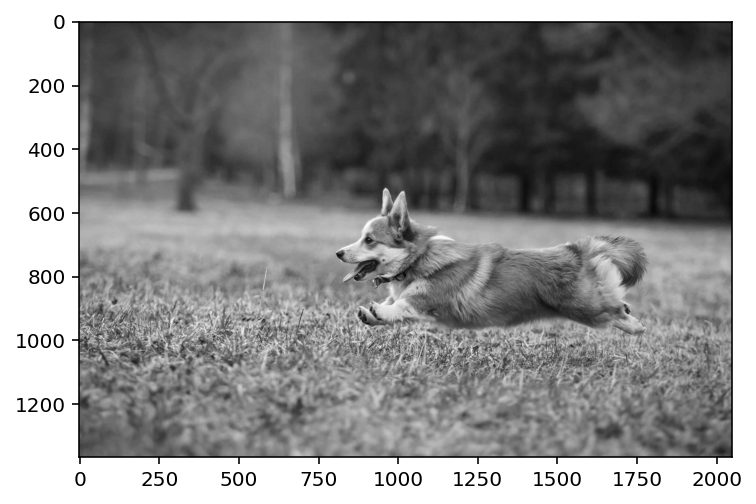

In [70]:
# Convert to grayscale
img = img.mean(axis=2)
plt.imshow(img, cmap='gray')

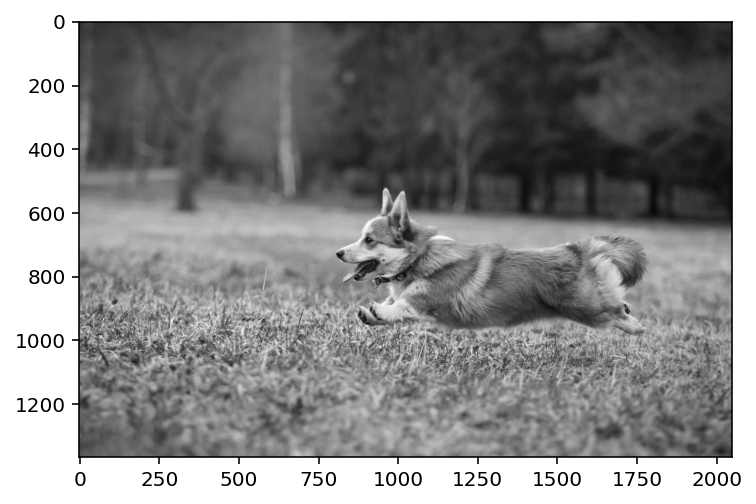

In [71]:
img = img/255
plt.imshow(img, cmap='gray')

In [72]:
# MF code with missing values
import torch
import torch.nn as nn
import torch.nn.functional as F

# INIT WELL!

def factorize(A, k, niter=100, lr=1e-3):
    n, m = A.shape
    # If we do not init well, our solution is poor
    W = torch.abs(torch.randn(n, k)/10)
    H = torch.abs(torch.randn(k, m)/10)
    W.requires_grad = True
    H.requires_grad = True

    # Mask where A is not missing
    mask = ~torch.isnan(A)
    print(mask.shape)

    optimizer = torch.optim.Adam([W, H], lr=lr)
    for i in range(niter):
        optimizer.zero_grad()
        Ahat = W @ H
        loss = F.mse_loss(Ahat[mask], A[mask])
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, loss.item())
    return W, H


In [73]:
A = torch.from_numpy(img).float()
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06878390163183212
10 0.017641961574554443
20 0.013675637543201447
30 0.012160271406173706
40 0.011076226830482483
50 0.009752877987921238
60 0.00799858570098877
70 0.006828860845416784
80 0.005765202455222607
90 0.005096124950796366
100 0.004480705596506596
110 0.004078681580722332
120 0.0037061739712953568
130 0.003374426392838359
140 0.003071725834161043
150 0.002793976804241538
160 0.0025442165788263083
170 0.002325482200831175
180 0.002138724084943533
190 0.0019804597832262516
200 0.0018459585262462497
210 0.0017309547401964664
220 0.0016330457292497158
230 0.0015512455720454454
240 0.0014844628749415278
250 0.0014310493133962154
260 0.0013891091803088784
270 0.001356679480522871
280 0.0013318833662196994
290 0.0013130680890753865
300 0.0012987118680030107
310 0.0012876922264695168
320 0.0012790841283276677
330 0.0012722165556624532
340 0.0012666513212025166
350 0.0012620592024177313
360 0.0012582143535837531
370 0.0012549541424959898
380 0.001252158777

In [74]:
W@H

tensor([[0.2180, 0.2236, 0.2274,  ..., 0.2116, 0.2148, 0.2170],
        [0.2181, 0.2236, 0.2274,  ..., 0.2113, 0.2145, 0.2166],
        [0.2194, 0.2248, 0.2286,  ..., 0.2115, 0.2145, 0.2166],
        ...,
        [0.3338, 0.3343, 0.3320,  ..., 0.3234, 0.3249, 0.3254],
        [0.3312, 0.3321, 0.3303,  ..., 0.3301, 0.3314, 0.3318],
        [0.3295, 0.3309, 0.3295,  ..., 0.3352, 0.3363, 0.3366]],
       grad_fn=<MmBackward0>)

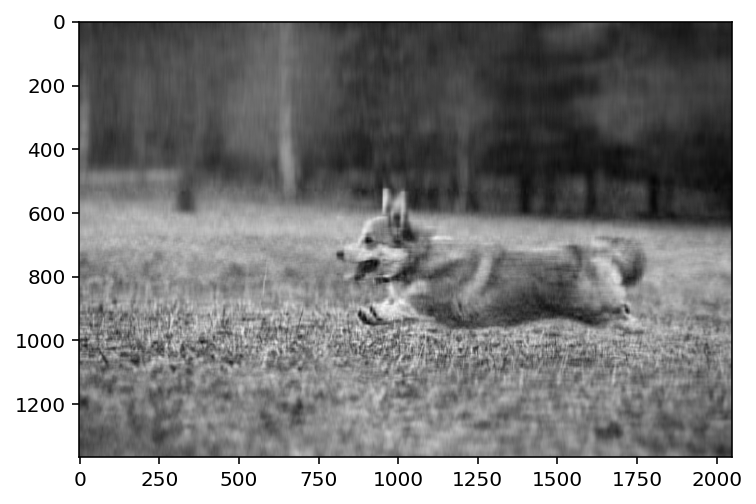

In [75]:
# Plot reconstructed image
plt.imshow((W @ H).detach().numpy(), cmap='gray')

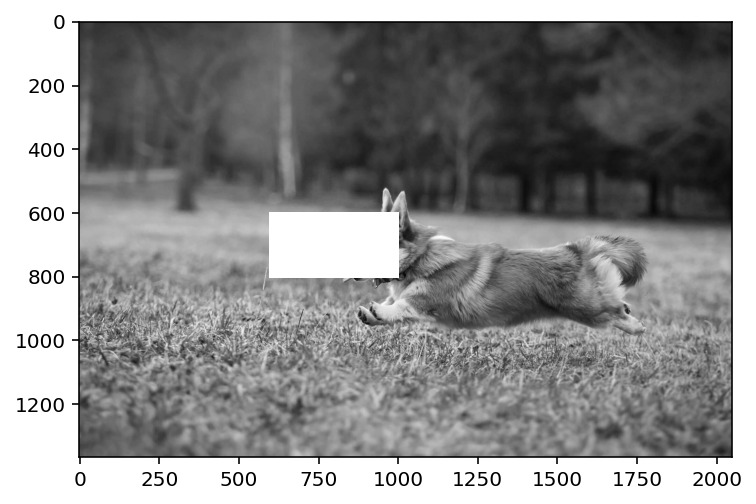

In [100]:
# Now, remove a rectangular patch from the image

patch = [600, 600, 800, 1000]
img_copy = img.copy()

# NAN the patch region
img_copy[patch[0]:patch[2], patch[1]: patch[3]] = np.NaN
plt.imshow(img_copy,cmap='gray')

In [101]:
A = torch.from_numpy(img_copy).float()
W, H = factorize(A, 40, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.06534166634082794
10 0.016764190047979355
20 0.01331931259483099
30 0.011844543740153313
40 0.010817058384418488
50 0.009500273503363132
60 0.007599512115120888
70 0.0062559195794165134
80 0.005385400261729956
90 0.004801942501217127
100 0.004279572982341051
110 0.0038952480535954237
120 0.0034984315279871225
130 0.0031491280533373356
140 0.00283654872328043
150 0.002559138461947441
160 0.002317321952432394
170 0.0021104514598846436
180 0.0019397551659494638
190 0.0017990069463849068
200 0.0016806680941954255
210 0.0015813149511814117
220 0.0014992393553256989
230 0.0014321209164336324
240 0.0013772461097687483
250 0.0013323401799425483
260 0.0012959304731339216
270 0.0012669989373534918
280 0.0012444277526810765
290 0.001226888969540596
300 0.0012131185503676534
310 0.0012020922731608152
320 0.00119305111002177
330 0.0011854616459459066
340 0.0011789959389716387
350 0.0011733113788068295
360 0.0011683371849358082
370 0.0011639605509117246
380 0.00115998333

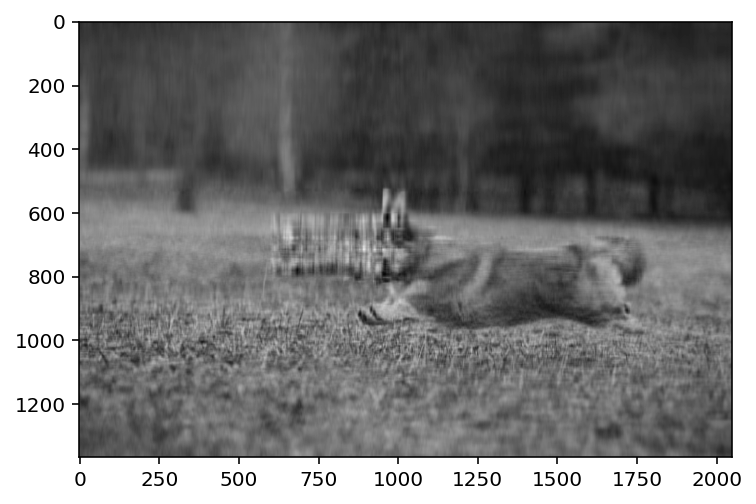

In [102]:
plt.imshow((W@H).detach().numpy(), cmap='gray')

In [103]:
A = torch.from_numpy(img_copy).float()
W, H = factorize(A, 60, niter=500, lr=1e-2)

torch.Size([1365, 2048])
0 0.03654739633202553
10 0.013844924978911877
20 0.011254158802330494
30 0.008139904588460922
40 0.005958809982985258
50 0.004800867289304733
60 0.0039076777175068855
70 0.003209929447621107
80 0.002667149296030402
90 0.0022080461494624615
100 0.001845289603807032
110 0.001571413828060031
120 0.0013656431110575795
130 0.0012097436701878905
140 0.001089801313355565
150 0.0009958198061212897
160 0.0009214665042236447
170 0.000862495566252619
180 0.0008156576077453792
190 0.0007784682093188167
200 0.0007491472060792148
210 0.0007263932493515313
220 0.000709055457264185
230 0.0006959859747439623
240 0.0006861292058601975
250 0.0006786245503462851
260 0.00067281280644238
270 0.0006682201637886465
280 0.0006645139073953032
290 0.0006614882149733603
300 0.0006589092081412673
310 0.0006567960954271257
320 0.0006548746605403721
330 0.0006532598636113107
340 0.0006518311565741897
350 0.0006505639175884426
360 0.0006494127446785569
370 0.0006483919569291174
380 0.00064747

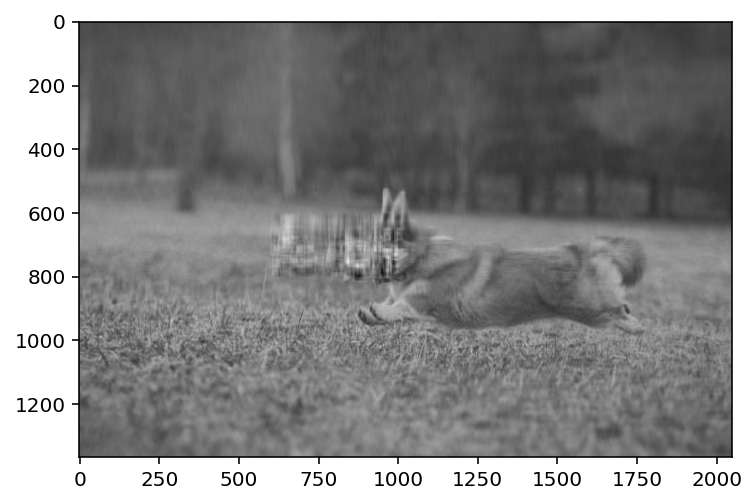

In [104]:
plt.imshow((W@H).detach().numpy(), cmap='gray')

In [99]:
A.size()[0]*A.size()[1]dd

2795520